In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist


In [7]:
# Imports needed
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 28
img_width = 28
batch_size = 2

model = keras.Sequential(
    [
        layers.Input((28, 28, 1)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(10),
    ]
)

#                      METHOD 1
# ==================================================== #
#             Using dataset_from_directory             #
# ==================================================== #
ds_train = tf.keras.preprocessing.image_dataset_from_directory("./mnist_dataset/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "./mnist_dataset/",
    labels="inferred",
    label_mode="int",  # categorical, binary
    # class_names=['0', '1', '2', '3', ...]
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset="validation",
)


data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.experimental.preprocessing.RandomContrast(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])

ds_train = ds_train.map(lambda x, y: (data_augmentation(x, training=True), y))

# Custom Loop
import tensorflow as tf

# Define your optimizer
optimizer = tf.keras.optimizers.Adam()

import tensorflow as tf

# Define your optimizer
optimizer = tf.keras.optimizers.Adam()

# Define your metric
acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

# Custom Loop
for epoch in range(10): 
    print(f"\nStart of Training Epoch {epoch}")
    for x, y in ds_train:
        with tf.GradientTape() as tape:
            y_pred = model(x, training=True)
            loss = tf.reduce_mean(
                tf.nn.sparse_softmax_cross_entropy_with_logits(
                    labels=y, logits=y_pred
                )
            )

        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        acc_metric.update_state(y, y_pred)

    train_acc = acc_metric.result()
    print(f"Accuracy over epoch {train_acc}")
    acc_metric.reset_states()
    
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True),],
    metrics=["accuracy"],
)

model.fit(ds_train, epochs=10, verbose=2)




Found 350 files belonging to 10 classes.
Using 315 files for training.
Found 350 files belonging to 10 classes.
Using 35 files for validation.

Start of Training Epoch 0
Accuracy over epoch 0.09841269999742508

Start of Training Epoch 1
Accuracy over epoch 0.2380952388048172

Start of Training Epoch 2
Accuracy over epoch 0.42222222685813904

Start of Training Epoch 3
Accuracy over epoch 0.5746031999588013

Start of Training Epoch 4
Accuracy over epoch 0.6380952596664429

Start of Training Epoch 5
Accuracy over epoch 0.7650793790817261

Start of Training Epoch 6
Accuracy over epoch 0.8253968358039856

Start of Training Epoch 7
Accuracy over epoch 0.8952381014823914

Start of Training Epoch 8
Accuracy over epoch 0.9269841313362122

Start of Training Epoch 9
Accuracy over epoch 0.9396825432777405
Epoch 1/10
158/158 - 2s - loss: 0.1515 - accuracy: 0.9683 - 2s/epoch - 14ms/step
Epoch 2/10
158/158 - 2s - loss: 0.1334 - accuracy: 0.9683 - 2s/epoch - 14ms/step
Epoch 3/10
158/158 - 2s - loss: 0


Start of Training Epoch 0
Accuracy over epoch 0.9920634627342224

Start of Training Epoch 1
Accuracy over epoch 0.9936507940292358

Start of Training Epoch 2
Accuracy over epoch 0.9682539701461792

Start of Training Epoch 3
Accuracy over epoch 0.961904764175415

Start of Training Epoch 4
Accuracy over epoch 0.9873015880584717

Start of Training Epoch 5
Accuracy over epoch 0.9746031761169434

Start of Training Epoch 6
Accuracy over epoch 0.9968253970146179

Start of Training Epoch 7
Accuracy over epoch 0.9968253970146179

Start of Training Epoch 8
Accuracy over epoch 1.0

Start of Training Epoch 9
Accuracy over epoch 1.0


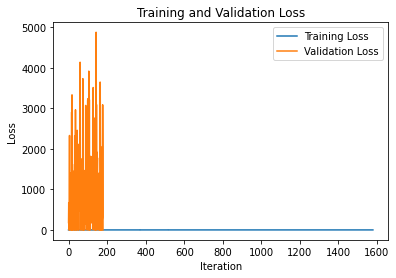

In [10]:
import matplotlib.pyplot as plt

train_losses = []
val_losses = []

# Custom Loop
for epoch in range(10): 
    print(f"\nStart of Training Epoch {epoch}")
    for x, y in ds_train:
        with tf.GradientTape() as tape:
            y_pred = model(x, training=True)
            loss = tf.reduce_mean(
                tf.nn.sparse_softmax_cross_entropy_with_logits(
                    labels=y, logits=y_pred
                )
            )

        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        acc_metric.update_state(y, y_pred)
        
        train_losses.append(loss.numpy())

    train_acc = acc_metric.result()
    print(f"Accuracy over epoch {train_acc}")
    acc_metric.reset_states()
    
    for x_val, y_val in ds_validation:
        y_val_pred = model(x_val, training=False)
        val_loss = tf.reduce_mean(
            tf.nn.sparse_softmax_cross_entropy_with_logits(
                labels=y_val, logits=y_val_pred
            )
        )
        val_losses.append(val_loss.numpy())
    
# Plot the training and validation losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [24]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 28
img_width = 28
batch_size = 2

model = keras.Sequential(
    [
        layers.Input((28, 28, 1)),
        layers.Conv2D(16, 3, padding="same"),
        layers.Conv2D(32, 3, padding="same"),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(10),
    ]
)


train_data_dir = "./mnist_dataset/"
validation_data_dir = "./mnist_dataset/"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical"
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode="categorical"
)


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=[keras.losses.CategoricalCrossentropy(from_logits=True)],
    metrics=["accuracy"],
)

model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Found 350 images belonging to 10 classes.
Found 350 images belonging to 10 classes.
Epoch 1/10
175/175 [==============================] - 3s 11ms/step - loss: 2.4396 - accuracy: 0.0914 - val_loss: 2.1866 - val_accuracy: 0.2714
Epoch 2/10
175/175 [==============================] - 1s 8ms/step - loss: 2.2682 - accuracy: 0.1800 - val_loss: 1.9558 - val_accuracy: 0.3400
Epoch 3/10
175/175 [==============================] - 1s 8ms/step - loss: 2.0652 - accuracy: 0.2486 - val_loss: 1.6702 - val_accuracy: 0.4486
Epoch 4/10
175/175 [==============================] - 2s 9ms/step - loss: 1.9149 - accuracy: 0.3571 - val_loss: 1.7208 - val_accuracy: 0.3600
Epoch 5/10
175/175 [==============================] - 2s 9ms/step - loss: 1.7814 - accuracy: 0.3943 - val_loss: 1.4206 - val_accuracy: 0.4714
Epoch 6/10
175/175 [==============================] - 1s 8ms/step - loss: 1.5948 - accuracy: 0.4371 - val_loss: 1.1078 - val_accuracy: 0.6343
Epoch 7/10
175/175 [==============================] - 1s 8ms/st

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the pretrained model on MNIST
pretrained_model = keras.models.load_model("./mnist_dataset/")

# Freeze all layers in the pretrained model
for layer in pretrained_model.layers:
    layer.trainable = False

# Add a new output layer for the new dataset
num_classes = 10 # Number of classes in the new dataset
output = layers.Dense(num_classes)(pretrained_model.layers[-2].output)

# Create the new model
model = keras.Model(pretrained_model.input, output)

# Compile the model
model.compile(
    optimizer="adam",
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

# Load and preprocess your own dataset (Persian dataset)
data_dir = "./your_persian_dataset_directory"
train_data_dir = os.path.join(data_dir, "train")
validation_data_dir = os.path.join(data_dir, "validation")

# Use ImageDataGenerator for data preprocessing
data_augmentation = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    fill_mode="nearest"
)

train_generator = data_augmentation.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),
    batch_size=32,
    color_mode="grayscale",
    class_mode="sparse",
    shuffle=True
)

validation_generator = data_augmentation.flow_from_directory(
    validation_data_dir,
    target_size=(28, 28),
    batch_size=32,
    color_mode="grayscale",
    class_mode="sparse",
    shuffle=False
)

# Train the model on the Persian dataset
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)